In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
import collections
%matplotlib inline

In [2]:
# read all lines from The Office
all_lines = pd.read_csv("../../data/raw/the_office_lines.csv")

In [3]:
all_lines.head(10)

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
5,6,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael,False
6,7,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael,False
7,8,1,1,3,Well. I don't know.,Pam,False
8,9,1,1,3,"If you think she's cute now, you should have s...",Michael,False
9,10,1,1,3,What?,Pam,False


In [4]:
all_lines.loc[(all_lines['speaker'] == 'Michael') | (all_lines['speaker'] == 'Dwight')]

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
5,6,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael,False
6,7,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael,False
8,9,1,1,3,"If you think she's cute now, you should have s...",Michael,False
10,11,1,1,3,Any messages?,Michael,False
12,13,1,1,3,"Oh! Pam, this is from Corporate. How many time...",Michael,False
14,15,1,1,3,It's called the wastepaper basket! Look at tha...,Michael,False
15,16,1,1,4,"People say I am the best boss. They go, 'God w...",Michael,False


In [5]:
# read only Michael and Dwight lines

lines = all_lines[(all_lines['speaker'] == "Michael") | (all_lines['speaker'] == "Dwight")]

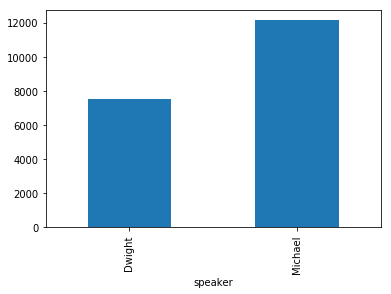

In [6]:
# check number of lines for Michael or Dwight

df1 = lines.groupby(['speaker']).id.count()

df1.plot.bar()


In [7]:
def preprocess(df):
    """
    Removing spaces and other punctuations in the text. Lowercase all text

    :param df (dataframe): line text
    :return: cleaned list
    """
    # clean spaces, punctuation, replace with lowercase
    replace_no_space = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
    replace_with_space = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    no_space = ""
    space = " "

    df = [replace_no_space.sub(no_space, line.lower()) for line in df]
    df = [replace_with_space.sub(space, line) for line in df]
    
    return df

In [8]:
# remove Stop Words
def remove_stop_words(df):
    """ Removing generic English stop words from text """

    english_stop_words = stopwords.words('english')
    english_stop_words.extend(('would', 'im', 'na'))
    removed_stop_words = []
    for d in df:
        removed_stop_words.append(
            ' '.join([word for word in d.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

In [9]:
def get_lemmatized_text(df):
    """ Lemmatize words in corpus to generalize or normalize words for training """

    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in d.split()]) for d in df]


In [10]:
# seperate text for michael and dwight

df_m = lines[lines['speaker'] == 'Michael']['line_text']
df_d = lines[lines['speaker'] == 'Dwight']['line_text']

In [11]:
## Cleaning

# pre processing
df_m = preprocess(df_m)
df_d = preprocess(df_d)

# remove stop words
df_m = remove_stop_words(df_m)
df_d = remove_stop_words(df_d)

In [12]:
# create a mike and dwight corpus

mike = ' '.join(df_m)
dwight = ' '.join(df_d)

## Frequency of words

In [13]:
# find frequency for mike's words
words_m = nltk.tokenize.word_tokenize(mike)
fdist_m = nltk.FreqDist(words_m)

filtered_word_freq_m = dict((word, freq) for word, freq in fdist_m.items() if not word.isdigit())

In [14]:
# sort by most frequent to least frequent

m = sorted(filtered_word_freq_m.items(), key=lambda x: x[1], reverse = True)
m[:20]

[('know', 1367),
 ('dont', 1129),
 ('oh', 1036),
 ('okay', 983),
 ('well', 883),
 ('like', 880),
 ('right', 817),
 ('go', 749),
 ('going', 736),
 ('good', 728),
 ('thats', 679),
 ('get', 660),
 ('yeah', 631),
 ('think', 591),
 ('want', 571),
 ('dwight', 566),
 ('yes', 562),
 ('hey', 551),
 ('one', 520),
 ('youre', 492)]

In [15]:
words_d = nltk.tokenize.word_tokenize(dwight)
fdist_d = nltk.FreqDist(words_d)

filtered_word_freq_d = dict((word, freq) for word, freq in fdist_d.items() if not word.isdigit())

In [16]:
d = sorted(filtered_word_freq_d.items(), key=lambda x: x[1], reverse = True)
d[:20]

[('oh', 473),
 ('jim', 430),
 ('know', 422),
 ('michael', 395),
 ('dont', 355),
 ('okay', 348),
 ('get', 340),
 ('like', 338),
 ('one', 303),
 ('go', 297),
 ('right', 278),
 ('youre', 257),
 ('good', 252),
 ('well', 251),
 ('dwight', 247),
 ('yeah', 247),
 ('thats', 245),
 ('come', 237),
 ('yes', 237),
 ('got', 230)]

### The results above indicate that the pre-existing stop words aren't sufficient. There are still a few very common English words that are used frequently.

*Added a few more words to the english stop words used based on above analysis*

In [17]:
import os

from os import path
from wordcloud import WordCloud

In [18]:
def draw_wordcloud(text, num):
    # show only 20 words in the wordcloud . 
    wordcloud = WordCloud(width=480, height=480, max_words=num, background_color="white").generate(text) 

    # plot the WordCloud image  
    plt.figure() 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis("off") 
    plt.margins(x=0, y=0) 
    plt.show() 

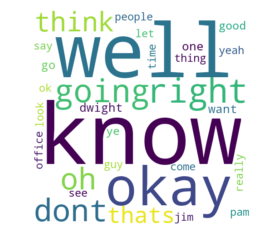

In [19]:
draw_wordcloud(mike, 30)

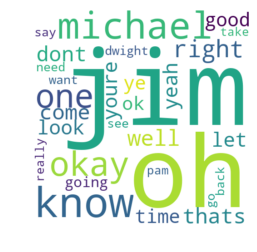

In [20]:
draw_wordcloud(dwight, 30)